# Reciclaje de Metales Preciosos en Dispositivos Electrónicos
## ¿Es posible estimar el valor económico de los metales preciosos recuperados de los dispositivos electrónicos desechados?

## INTRODUCCIÓN

Los metales preciosos como el oro, la plata, el platino y el rodio desempeñan un papel fundamental en el funcionamiento de los dispositivos electrónicos modernos. Estos materiales son altamente valorados no solo por su escasez, sino por sus propiedades únicas: conducen la electricidad de manera excepcional, son resistentes a la corrosión y tienen una gran estabilidad química. Por ello, se utilizan en componentes críticos como microprocesadores, contactos eléctricos, memorias, placas de circuito y baterías. Sin estos metales, la eficiencia y fiabilidad de dispositivos como teléfonos móviles, ordenadores, televisores y electrodomésticos sería considerablemente menor.

La recuperación de metales preciosos a través del reciclaje de aparatos electrónicos en desuso no solo tiene un enorme valor económico, sino también ambiental. A medida que aumenta el consumo global de tecnología, también lo hace la generación de residuos electrónicos, que contienen recursos valiosos. Reciclar estos dispositivos permite reducir la dependencia de la minería tradicional —una actividad intensiva en energía y contaminante— y contribuye a un modelo de economía circular más sostenible. Además, la correcta gestión de estos materiales ayuda a evitar la contaminación del suelo y del agua causada por la acumulación de residuos tóxicos en vertederos.


Los datos han sido conseguidos en Kaggle en:

 https://www.kaggle.com/datasets/abhaynb/precious-metal-content-in-e-waste

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Dispongo de 3 archivos csv que tras analizarlos parecen similares, siendo el "updated_e_waste dataset" es que tiene mas columnas.

In [ ]:
df= pd.read_csv('../data/raw/e_waste_dataset.csv', delimiter=',')

df

,Item,Gold (g),Aluminum (g),Silver (g),Carbon (g),Platinum (g),Rhodium (g),Nickel (g),Tin (g),Lithium (g)
0,OnePlus 9 Pro,0.43,1.01,0.84,0.61,0.07,0.08,0.49,1.19,0.38
1,Nintendo Switch,1.92,1.52,2.71,0.74,0.08,0.09,0.40,0.55,2.91
2,HP Spectre x360,1.42,1.29,2.29,0.97,0.19,0.10,0.65,0.68,0.85
3,Amazon Kindle,0.47,1.60,0.79,0.89,0.16,0.06,0.49,0.91,0.94
4,OnePlus 9 Pro,2.78,1.02,2.68,0.54,0.11,0.06,1.37,0.74,0.31
...,...,...,...,...,...,...,...,...,...,...
9995,Nikon D3500,4.39,1.10,1.64,0.54,0.08,0.06,1.16,0.58,0.22
9996,Nikon D3500,3.53,0.60,0.98,0.47,0.13,0.07,0.37,0.36,0.54
9997,Lenovo ThinkPad X1,3.53,0.55,1.96,0.77,0.07,0.09,0.55,0.39,0.11
9998,Dell XPS 13,4.58,0.84,2.81,0.58,0.11,0.01,1.30,0.60,2.57


In [29]:
df_profit= pd.read_csv('../data/raw/e_waste_dataset_with_profit.csv', delimiter=',')
df_profit

,Item,Category,Gold,Silver,Platinum,Rhodium,Nickel,Tin,Lithium,Aluminum,Carbon,Profit ($)
0,iPhone 11,Cat3,3.58,2.95,1.73,8.92,1.91,1.01,1.82,1.27,9.51,270.34
1,Toaster,Cat2,7.21,4.31,6.21,5.63,9.59,7.65,0.51,3.03,4.22,689.75
2,Speaker,Cat4,8.91,5.09,2.42,7.70,1.09,1.49,7.42,3.63,8.83,570.43
3,Microwave Oven,Cat2,2.62,3.84,2.98,7.66,9.41,2.25,7.84,6.18,6.36,290.78
4,Air Conditioner,Cat1,3.47,3.89,6.20,4.35,5.07,8.65,8.62,0.82,5.53,505.16
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Fridge,Cat1,1.99,2.37,0.62,2.23,4.72,6.75,3.48,7.98,1.36,132.55
9996,Iron,Cat2,8.57,8.68,3.46,5.25,2.78,0.78,9.72,4.46,5.69,611.51
9997,Air Conditioner,Cat1,9.30,6.22,2.30,7.07,7.94,5.56,4.38,7.93,4.67,583.98
9998,Stove,Cat1,6.13,6.74,4.51,9.03,8.76,9.45,3.16,9.93,7.28,547.01


In [30]:
df_updated=pd.read_csv('../data/raw/updated_e_waste_dataset.csv', delimiter=',')

df_updated

,Item Name,Category,Brand Name,Device Age,Device Condition,Material Recovery Rate,Device Type,Year of Manufacture,Market Value of Metals,Cost of Recovery,...,Aluminum (g),Silver (g),Carbon (g),Platinum (g),Rhodium (g),Nickel (g),Tin (g),Lithium (g),Current Metal Value ($),Recycling Score
0,Toshiba Fire TV,Cat2,Panasonic,3,Broken,50.94,Consumer Electronics,2000,495.04,34.41,...,22.73,0.35,2.54,1.56,0.05,14.94,0.64,6.13,253.866639,4
1,LG Sound Bar,Cat4,Panasonic,12,Broken,92.22,Consumer Electronics,1996,494.41,10.02,...,46.69,0.04,2.42,0.45,0.78,1.98,4.96,4.48,658.490621,4
2,Nikon D850,Cat1,Sony,23,Good,76.64,Appliance,2002,700.20,10.89,...,44.67,1.59,2.58,0.62,0.79,11.73,1.05,6.74,723.642095,3
3,Amazon Echo,Cat4,Lenovo,9,Broken,69.67,Appliance,2024,533.94,7.37,...,22.94,2.40,6.13,0.58,0.77,0.25,0.28,5.03,693.395058,4
4,JBL Charge 4,Cat3,Sony,17,Good,65.51,Consumer Electronics,2003,493.42,42.26,...,40.85,1.70,7.07,0.82,0.82,10.61,1.81,4.82,578.926631,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Ring Doorbell,Cat3,Sony,7,Good,64.63,Consumer Electronics,2009,461.05,33.57,...,4.32,1.52,1.44,1.83,0.63,5.68,1.30,5.00,562.738060,5
9996,Galaxy Note 20,Cat2,Panasonic,22,Average,78.43,IT Equipment,1992,476.58,30.16,...,44.90,2.18,6.87,1.67,0.32,9.92,2.12,5.95,338.855302,4
9997,MacBook Air,Cat2,LG,13,Good,53.13,IT Equipment,2023,564.34,35.70,...,29.81,1.75,2.52,1.46,0.52,9.35,1.81,5.67,537.209241,4
9998,Google Home,Cat4,Panasonic,4,Broken,84.26,Consumer Electronics,2021,640.73,46.26,...,0.19,2.29,8.64,1.03,0.84,14.73,3.12,6.65,656.193897,4


In [31]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Item Name                10000 non-null  object 
 1   Category                 10000 non-null  object 
 2   Brand Name               10000 non-null  object 
 3   Device Age               10000 non-null  int64  
 4   Device Condition         10000 non-null  object 
 5   Material Recovery Rate   10000 non-null  float64
 6   Device Type              10000 non-null  object 
 7   Year of Manufacture      10000 non-null  int64  
 8   Market Value of Metals   10000 non-null  float64
 9   Cost of Recovery         10000 non-null  float64
 10  Profit                   10000 non-null  float64
 11  Gold (g)                 10000 non-null  float64
 12  Aluminum (g)             10000 non-null  float64
 13  Silver (g)               10000 non-null  float64
 14  Carbon (g)             

In [32]:
df_updated.describe()

,Device Age,Material Recovery Rate,Year of Manufacture,Market Value of Metals,Cost of Recovery,Profit,Gold (g),Aluminum (g),Silver (g),Carbon (g),Platinum (g),Rhodium (g),Nickel (g),Tin (g),Lithium (g),Current Metal Value ($),Recycling Score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,15.303100,72.369248,2006.987500,447.174891,27.565310,419.609581,2.509324,25.016325,1.504517,4.971232,0.996699,0.504447,7.505806,2.493625,3.500915,467.185628,3.997100
std,8.572711,12.949378,10.082198,107.964751,13.002355,108.756357,1.455841,14.377568,0.861711,2.878276,0.575660,0.285840,4.311712,1.451079,2.019016,181.666582,0.711156
min,1.000000,50.000000,1990.000000,114.350000,5.000000,76.140000,0.010000,0.020000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,29.663523,3.000000
25%,8.000000,61.130000,1998.000000,371.540000,16.510000,344.772500,1.260000,12.540000,0.760000,2.450000,0.490000,0.260000,3.780000,1.240000,1.760000,323.953084,3.000000
50%,15.000000,72.220000,2007.000000,446.910000,27.540000,419.920000,2.510000,24.950000,1.510000,4.985000,0.990000,0.500000,7.495000,2.480000,3.520000,467.616810,4.000000
75%,23.000000,83.590000,2016.000000,523.360000,38.720000,495.652500,3.790000,37.370000,2.250000,7.460000,1.490000,0.760000,11.230000,3.740000,5.280000,610.113601,5.000000
max,30.000000,95.000000,2024.000000,794.550000,50.000000,777.150000,5.000000,50.000000,3.000000,10.000000,2.000000,1.000000,15.000000,5.000000,7.000000,898.114518,5.000000


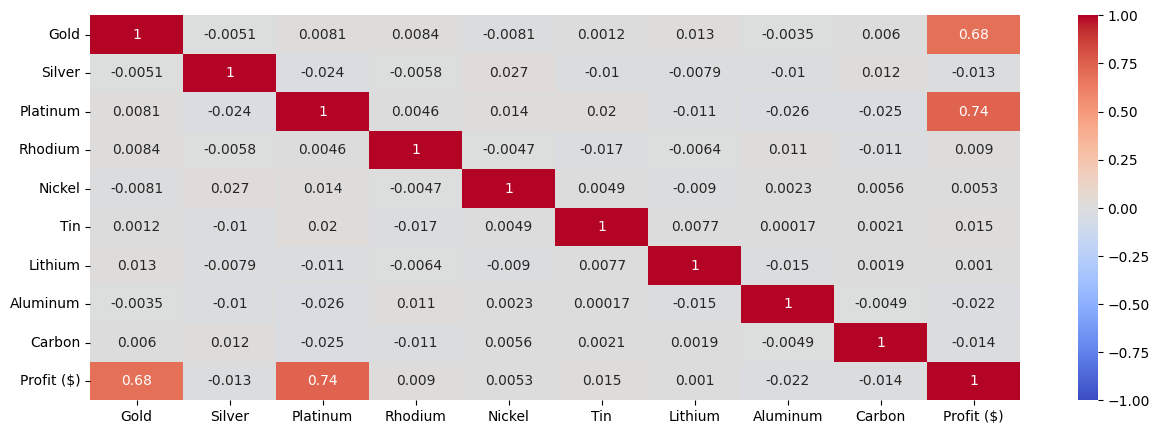

In [33]:
plt.figure(figsize=[15,5])
sns.heatmap (df_profit.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1);

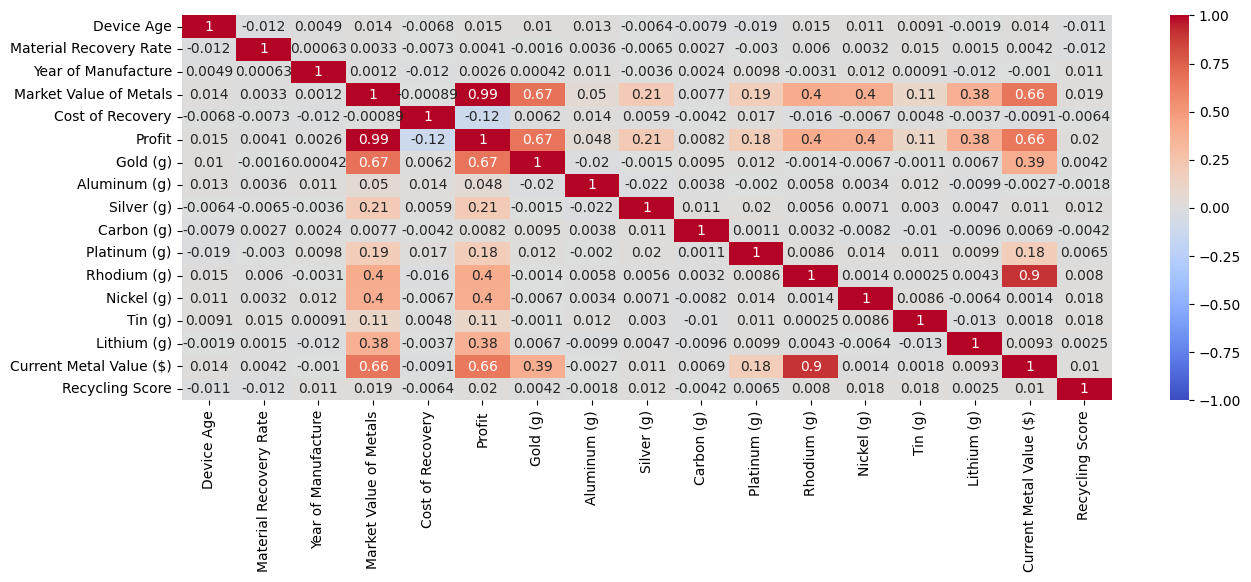

In [34]:
plt.figure(figsize=[15,5])
sns.heatmap (df_updated.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1);

Se quiere comprobar la relacion entre la cantidad de materiales preciosos que tiene cada aparato, con el valor de mercado del material y la ganancia que se puede obtener con su reciclaje.

Veremos con las variables objeto si existen otras relaciones interesantes que puedan influir en esa posible ganancia.



| **Nombre de la Variable** | **Unidad**        | **Descripción**                                                                                     |
| ------------------------- | ----------------- | --------------------------------------------------------------------------------------------------- |
| `Item` / `Item Name`      | Texto             | Nombre del dispositivo o electrodoméstico.                                                          |
| `Category`                | Texto (Cat1–Cat4) | Clasificación del dispositivo (por tipo, prioridad, u otra segmentación).                           |
| `Brand Name`              | Texto             | Marca del dispositivo.                                                                              |
| `Device Type`             | Texto             | Tipo de dispositivo (e.g., Consumer Electronics, Appliance, IT Equipment).                          |
| `Device Age`              | Años              | Edad del dispositivo desde su fabricación.                                                          |
| `Year of Manufacture`     | Año               | Año en que fue fabricado el dispositivo.                                                            |
| `Device Condition`        | Texto             | Estado físico del dispositivo (e.g., Good, Average, Broken).                                        |
| `Material Recovery Rate`  | Porcentaje (%)    | Tasa de recuperación de materiales mediante reciclaje.                                              |
| `Market Value of Metals`  | Dólares (\$)      | Valor total de los metales contenidos en el dispositivo según el mercado actual.                    |
| `Cost of Recovery`        | Dólares (\$)      | Costo estimado para extraer y reciclar los materiales.                                              |
| `Profit`                  | Dólares (\$)      | Ganancia neta (`Market Value - Cost of Recovery`).                                                  |
| `Current Metal Value`     | Dólares (\$)      | Valor actual estimado de los metales contenidos.                                                    |
| `Recycling Score`         | Entero (1–5)      | Puntuación del dispositivo según criterios de reciclaje (eficiencia, rentabilidad, sostenibilidad). |


| **Metal**      | **Descripción**                                                          |
| -------------- | ------------------------------------------------------------------------ |
| `Gold (g)`     | Oro presente en el dispositivo.                                          |
| `Silver (g)`   | Plata presente en el dispositivo.                                        |
| `Platinum (g)` | Platino presente en el dispositivo.                                      |
| `Rhodium (g)`  | Rodio presente, un metal precioso de alto valor.                         |
| `Nickel (g)`   | Níquel presente, común en baterías y circuitos.                          |
| `Tin (g)`      | Estaño, usado principalmente en soldaduras.                              |
| `Lithium (g)`  | Litio, componente principal de baterías recargables.                     |
| `Aluminum (g)` | Aluminio presente en carcasas, disipadores, etc.                         |
| `Carbon (g)`   | Carbono, puede representar material estructural o contenido en baterías. |


El target es PROFIT

Regresión